In [1]:
import pandas as pd

feats = ['Loudness_sma3', 'alphaRatio_sma3',
       'hammarbergIndex_sma3', 'slope0-500_sma3', 'slope500-1500_sma3',
       'shimmerLocaldB_sma3nz', 'HNRdBACF_sma3nz',
       'logRelF0-H1-H2_sma3nz', 'logRelF0-H1-A3_sma3nz',
       'F1frequency_sma3nz', 'F1bandwidth_sma3nz',
       'F1amplitudeLogRelF0_sma3nz', 'F2frequency_sma3nz',
       'F2amplitudeLogRelF0_sma3nz', 'F3frequency_sma3nz',
       'F3amplitudeLogRelF0_sma3nz','F0semitoneFrom27.5Hz_sma3nz', 
        'jitterLocal_sma3nz']

In [2]:
# Libs for AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [3]:
# Libs for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [4]:
wd = '/scratch/midway3/graziul/'

In [5]:
def add_date_time(df):
    
    def get_metadata_from_filename(f):
        fn = f.split('.')[0].split('-')[0]
        y = fn[0:4]
        m = fn[4:6]
        d = fn[6:8]
        t = fn[8:]
        return int(y), int(m), int(d), int(t)

    df[['y','m','d','t']] = df['file'].apply(lambda x: get_metadata_from_filename(x)).apply(pd.Series)        
 
    return df

In [6]:
def add_shift(df):
    first_shift = (df['t'] >= 900) & (df['t'] < 1700)
    second_shift = (df['t'] >= 1700) | (df['t'] < 100)
    third_shift = (df['t'] >=100) & (df['t'] <900)

    df.loc[first_shift, 'shift'] = '1st shift (9a-5p)'
    df.loc[second_shift, 'shift'] = '2nd shift (5p-1a)'
    df.loc[third_shift, 'shift'] = '3rd shift (1a-9a)'
    
    return df

In [7]:
# Loading in file-level std dev for GeMAPS features
df_z1sd = pd.read_csv(wd+'z1gemapsv01b_FileStdDev.csv')
df_z4sd = pd.read_csv(wd+'z4gemapsv01b_FileStdDev.csv')
df_z8sd = pd.read_csv(wd+'z8gemapsv01b_FileStdDev.csv')
df_z13sd = pd.read_csv(wd+'z13gemapsv01b_FileStdDev.csv')

### Look at Zone 1 (file level std dev of GeMAPS features)

In [8]:
df_z1sd = add_date_time(df_z1sd)
df_z1sd = add_shift(df_z1sd)
df_z1sd[feats] = StandardScaler().fit_transform(df_z1sd[[i for i in df_z1sd.columns.values if i in feats]])

In [9]:
df_z1sd.groupby('shift').describe(percentiles=[0.5]).T.head(50)

shift                        1st shift (9a-5p)  2nd shift (5p-1a)  \
Loudness_sma3         count        5607.000000        5519.000000   
                      mean            0.025488           0.030047   
                      std             0.902645           0.933964   
                      min            -0.712808          -0.657376   
                      50%            -0.413862          -0.410726   
                      max             8.718897           7.965072   
alphaRatio_sma3       count        5607.000000        5519.000000   
                      mean           -0.017432           0.014076   
                      std             0.894678           0.941777   
                      min            -3.918915          -1.630471   
                      50%            -0.315714          -0.297542   
                      max             6.329728           9.115250   
hammarbergIndex_sma3  count        5607.000000        5519.000000   
                      mean            0.010622           0.017942   
                      std             0.840740           0.868905   
                      min            -2.688746          -1.070683   
                      50%            -0.310813          -0.308767   
                      max            10.737288           9.531070   
slope0-500_sma3       count        5607.000000        5519.000000   
                      mean            0.032986           0.016906   
                      std             0.991289           0.989374   
                      min            -5.852991          -1.785413   
                      50%            -0.386540          -0.382564   
                      max             6.946148           7.806910   
slope500-1500_sma3    count        5607.000000        5519.000000   
                      mean            0.001427           0.001936   
                      std             0.987814           0.965876   
                      min            -4.396923          -1.901988   
                      50%            -0.320847          -0.302985   
                      max             4.891664           5.230054   
shimmerLocaldB_sma3nz count        5607.000000        5519.000000   
                      mean            0.000000           0.000000   
                      std             0.000000           0.000000   
                      min             0.000000           0.000000   
                      50%             0.000000           0.000000   
                      max             0.000000           0.000000   
HNRdBACF_sma3nz       count        5607.000000        5519.000000   
                      mean            0.000000           0.000000   
                      std             0.000000           0.000000   
                      min             0.000000           0.000000   
                      50%             0.000000           0.000000   
                      max             0.000000           0.000000   
logRelF0-H1-H2_sma3nz count        5607.000000        5519.000000   
                      mean            0.000000           0.000000   
                      std             0.000000           0.000000   
                      min             0.000000           0.000000   
                      50%             0.000000           0.000000   
                      max             0.000000           0.000000   
logRelF0-H1-A3_sma3nz count        5607.000000        5519.000000   
                      mean            0.000000           0.000000   

shift                        3rd shift (1a-9a)  
Loudness_sma3         count        5653.000000  
                      mean           -0.054616  
                      std             1.142116  
                      min            -1.331508  
                      50%            -0.421458  
                      max            15.855611  
alphaRatio_sma3       count        5653.000000  
                      mean            0.003548  
                      std             1

### Look at Zone 1 PCA data (5 dims)

In [10]:
df_z1pca = pd.read_parquet('z1pca5.parquet')
df_z1pca.head()

,file,dim1,dim2,dim3,dim4,dim5
0,201907082355-948170-27730.mp3,0.08815,-0.038387,0.161491,0.0576,0.020966
0,201907090025-841246-27730.mp3,0.08815,-0.038387,0.161491,0.0576,0.020966
0,201907090055-788405-27730.mp3,0.08815,-0.038387,0.161491,0.0576,0.020966
0,201907090124-956726-27730.mp3,0.08815,-0.038387,0.161491,0.0576,0.020966
0,201907090154-501478-27730.mp3,0.08815,-0.038387,0.161491,0.0576,0.020966


In [11]:
df_z1pcaF = df_z1pca.groupby('file').mean().reset_index()
df_z1pcaF.to_csv(wd+'z1pca5File.csv',index=False)
df_z1pcaF

,file,dim1,dim2,dim3,dim4,dim5
0,201808040607-817542-27730.mp3,-0.027933,-0.008711,0.011471,0.016983,0.006457
1,201808040636-306923-27730.mp3,-0.027540,-0.005254,0.012879,0.017511,0.005715
2,201808040706-364235-27730.mp3,-0.026232,-0.006041,0.012632,0.016820,0.006221
3,201808040736-102899-27730.mp3,-0.026065,-0.006318,0.012187,0.016563,0.005896
4,201808040806-221733-27730.mp3,-0.027977,-0.005734,0.012745,0.016252,0.006473
...,...,...,...,...,...,...
16774,201908051327-417529-27730.mp3,-0.026991,-0.006132,0.012337,0.017151,0.005975
16775,201908051356-144714-27730.mp3,-0.026904,-0.006356,0.012565,0.017137,0.006087
16776,201908051426-809762-27730.mp3,-0.027207,-0.006197,0.012622,0.017254,0.005842
16777,201908051456-878703-27730.mp3,-0.027034,-0.006509,0.012262,0.016972,0.005897


In [12]:
dims = ['dim1','dim2','dim3','dim4','dim5']
df_z1pcaF[dims] = StandardScaler().fit_transform(df_z1pcaF[[i for i in df_z1pcaF.columns.values if i in dims]])
df_z1pcaF = add_date_time(df_z1pcaF)
df_z1pcaF = add_shift(df_z1pcaF)
df_z1pcaF.head()

,file,dim1,dim2,dim3,dim4,dim5,y,m,d,t,shift
0,201808040607-817542-27730.mp3,-0.420676,-2.583525,-0.950739,0.099551,1.206556,2018,8,4,607,3rd shift (1a-9a)
1,201808040636-306923-27730.mp3,-0.023197,0.980546,1.017904,1.292405,-0.703054,2018,8,4,636,3rd shift (1a-9a)
2,201808040706-364235-27730.mp3,1.303279,0.168827,0.673627,-0.268807,0.599302,2018,8,4,706,3rd shift (1a-9a)
3,201808040736-102899-27730.mp3,1.471852,-0.116885,0.051332,-0.849012,-0.235939,2018,8,4,736,3rd shift (1a-9a)
4,201808040806-221733-27730.mp3,-0.465582,0.485906,0.830952,-1.550937,1.247780,2018,8,4,806,3rd shift (1a-9a)


In [13]:
dims = ['dim1','dim2','dim3','dim4','dim5']
df_z1pcaF[dims] = StandardScaler().fit_transform(df_z1pcaF[[i for i in df_z1pcaF.columns.values if i in dims]])

In [14]:
df_z1pcaF.groupby('shift')[dims].describe().T.head(50)

shift       1st shift (9a-5p)  2nd shift (5p-1a)  3rd shift (1a-9a)
dim1 count        5607.000000        5519.000000        5653.000000
     mean           -0.021334           0.129195          -0.104972
     std             0.779933           0.703946           1.361534
     min            -4.638651          -4.596279         -31.073259
     25%            -0.366640          -0.238369          -0.522284
     50%             0.073122           0.130069          -0.042330
     75%             0.489390           0.507383           0.396450
     max            14.449745           4.371020          17.285235
dim2 count        5607.000000        5519.000000        5653.000000
     mean            0.189523           0.092132          -0.277929
     std             0.760760           0.680323           1.349664
     min           -22.646834          -2.915017         -33.077472
     25%            -0.123675          -0.156189          -1.000821
     50%             0.059087           0.035711          -0.068028
     75%             0.451932           0.349605           0.318950
     max            10.129337           5.118619          25.440731
dim3 count        5607.000000        5519.000000        5653.000000
     mean            0.033664           0.275405          -0.302267
     std             0.817972           0.767294           1.250480
     min           -14.470804          -5.703918         -17.125093
     25%            -0.401285          -0.081020          -0.983979
     50%             0.225505           0.342990          -0.190034
     75%             0.530219           0.605851           0.396477
     max             5.987477           5.096770           9.921390
dim4 count        5607.000000        5519.000000        5653.000000
     mean           -0.018527           0.147987          -0.126102
     std             0.908128           0.735863           1.258734
     min           -21.616118          -3.513321         -19.020500
     25%            -0.551507          -0.279875          -0.724731
     50%             0.229353           0.355949           0.174393
     75%             0.573620           0.677780           0.646810
     max            16.489374           3.279594          17.154652
dim5 count        5607.000000        5519.000000        5653.000000
     mean           -0.084143          -0.051156           0.133402
     std             0.688324           0.656017           1.432207
     min            -7.598852          -6.991743         -20.045167
     25%            -0.316195          -0.277669          -0.310567
     50%            -0.112163          -0.089574           0.076144
     75%             0.141394           0.176445           0.889298
     max            16.254659           4.686084          25.158600

In [15]:
X = df_z1pcaF[dims].values

In [16]:
db = DBSCAN(eps=0.8, min_samples=5, metric='euclidean').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [17]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 7
Estimated number of noise points: 846
Silhouette Coefficient: 0.313


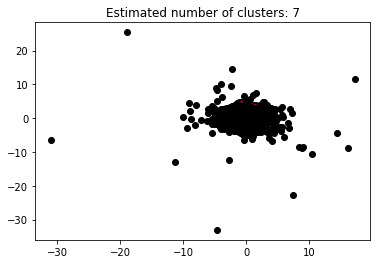

In [18]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()